In [1]:
import lib
import qutip as qt
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
def reim(nn_output):
    return nn_output[:, 0] + 1.j * nn_output[:, 1] # Re, Im
def logamp_phase(nn_output):
    return torch.exp(nn_output[:, 0]) * torch.exp(1.j * nn_output[:, 1]) # Log amp, phase
def logamp_phase_c(nn_output):
    return (torch.exp(nn_output[:, 0]) - 0.05) * torch.exp(1.j * nn_output[:, 1]) 

In [3]:
evec_data = []
eval_data = []
epochs_data = []
J = 1
gamma_vals = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
for n in range(2, 7):
    print(n)
    print(time.time())
    fidelities = []
    evals = []
    graphs = []
    for Gamma in gamma_vals:
        # init neural network
        model = nn.Sequential(
            nn.Linear(n, 5 * n),
            nn.Sigmoid(),
            nn.Linear(5 * n, 2),
            nn.Sigmoid()
        )
        input = lib.generate_input_torch(n)

        # train NN

        vars = (n, J, Gamma)
        loss_fn = lib.TFIM_expectation_from_torch
        epochs = []
        loss_data = []
        optimizer = torch.optim.SGD(model.parameters(), lr = 2)
        for epoch in range(1000):
            y_pred = model(input)
            loss = loss_fn(y_pred, vars, reim)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if epoch % 100 == 0:
                loss_data.append(loss.item())
                epochs.append(epoch)

        # find groud state
        gs = lib.model_to_ground_state(model, input, reim)
        
        # confirmation
        h = lib.TFIM_hamiltonian(n, J, Gamma)

        fidelities.append(qt.fidelity(qt.Qobj([s for s in gs]), h.eigenstates()[1][0]))
        evals.append(loss_data[-1])
        graphs.append(loss_data)
    evec_data.append(fidelities)
    eval_data.append(evals)
    epochs_data.append(graphs)
print(time.time())

2
1728705076.8560858
3
1728705105.342888
4
1728705153.7367902
5
1728705208.9366674
6
1728705314.358408
1728705563.5577528


In [4]:
true_evals = []
for n in range(2, 7):
    x = []
    for Gamma in gamma_vals:
        h = lib.TFIM_hamiltonian(n, J, Gamma)
        x.append(h.eigenstates()[0][0])
    true_evals.append(x)

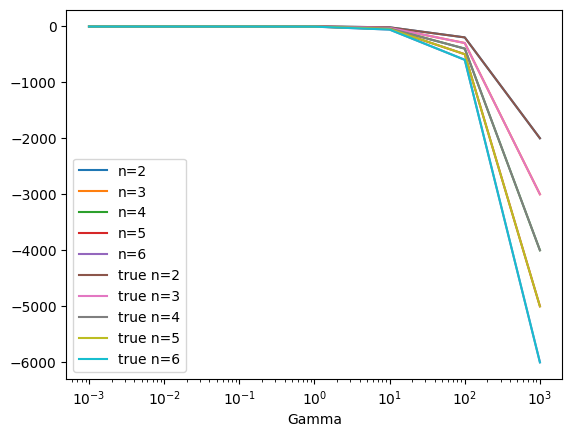

In [5]:
for i in range(len(eval_data)):
    plt.plot(gamma_vals, eval_data[i], label=f'n={i + 2}')
for i in range(len(true_evals)):
    plt.plot(gamma_vals, true_evals[i], label = f'true n={i + 2}')
plt.xlabel('Gamma')
plt.ylabel('')
plt.legend(loc = 'best')
plt.xscale('log')
# plt.yscale('log')
plt.show()

In [6]:
np.abs(np.array(eval_data) - np.array(true_evals))

array([[1.22951103e-04, 1.10368708e-04, 4.96141992e-03, 2.10292414e-05,
        1.18390570e-06, 1.00156128e-05, 6.33788809e-04],
       [1.20436502e-04, 1.26635451e-04, 4.05172472e-04, 2.52723694e-05,
        4.80775775e-06, 2.96106066e-07, 9.94515663e-04],
       [1.52395798e-04, 4.37369652e-05, 5.67265042e-05, 4.17421654e-05,
        3.67947109e-04, 9.39063580e-06, 1.00000037e-03],
       [1.27135010e-04, 4.06006316e-05, 3.45887923e-05, 2.69597163e-03,
        4.40472581e-03, 4.89089857e-05, 1.25000007e-03],
       [1.25954498e-04, 3.69905313e-05, 2.50359579e-05, 1.78462160e-02,
        1.50084992e-01, 1.07515651e-04, 1.98828133e-03]])

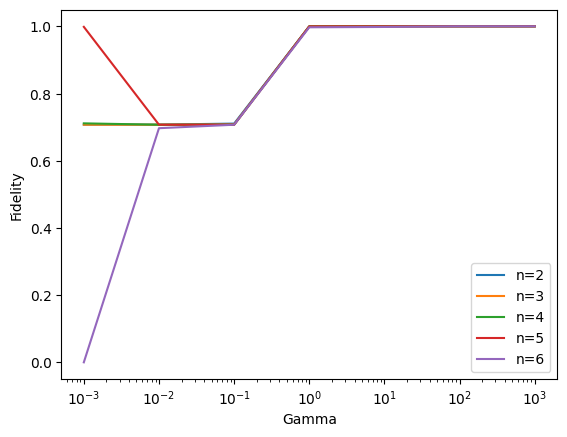

In [7]:
for i in range(len(evec_data)):
    plt.plot(gamma_vals, evec_data[i], label=f'n={i + 2}')
plt.xlabel('Gamma')
plt.ylabel('Fidelity')
plt.legend(loc = 'best')
plt.xscale('log')
# plt.yscale('log')
plt.show()

In [8]:
np.array(epochs_data).shape

(5, 7, 10)

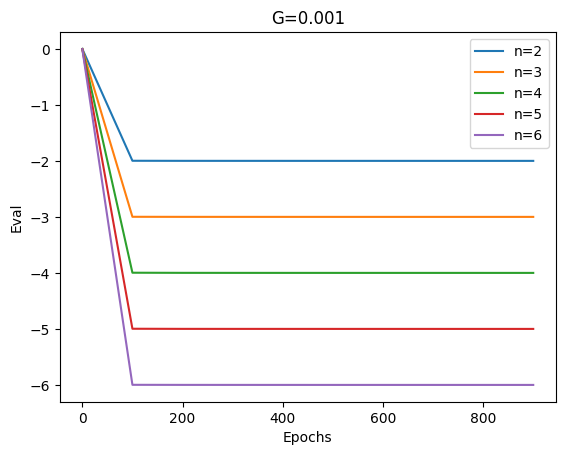

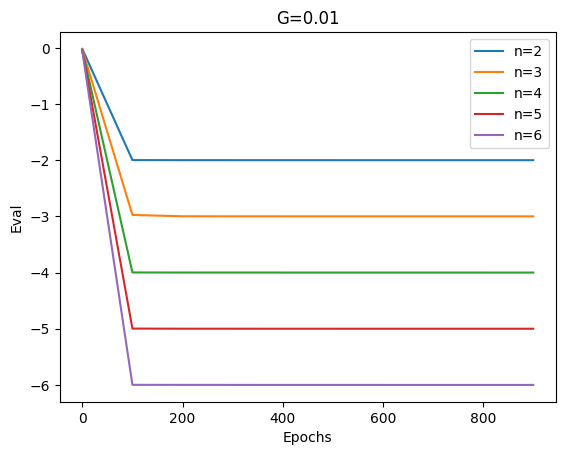

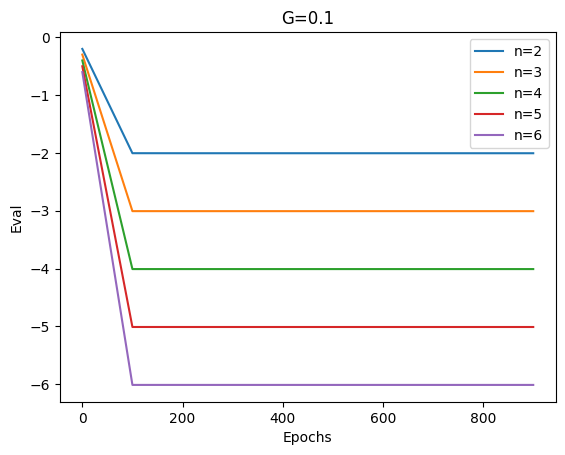

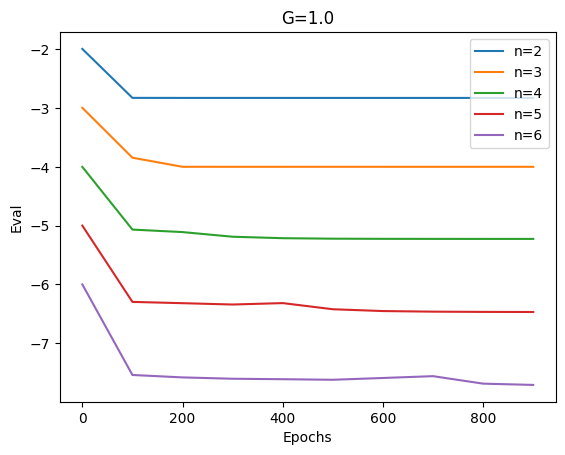

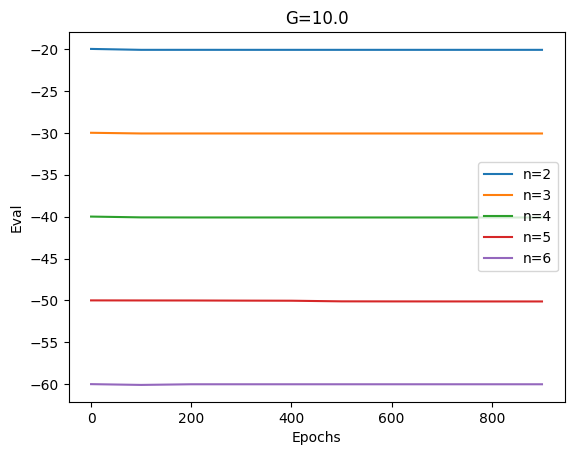

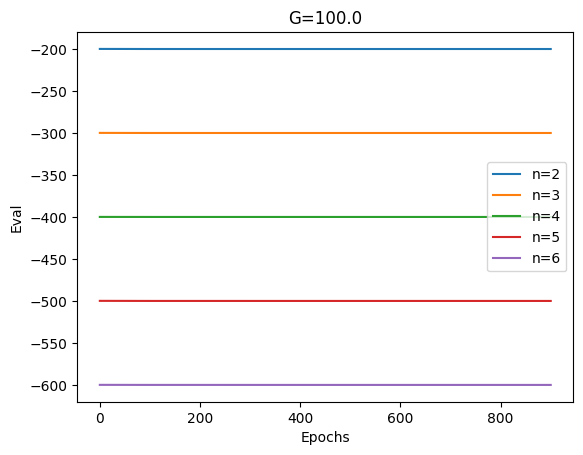

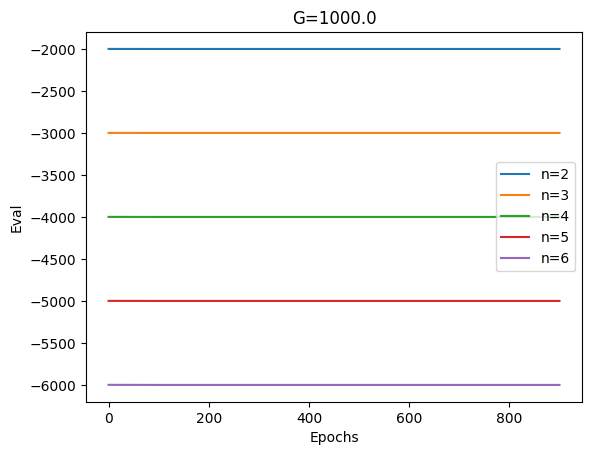

In [9]:
epochs = [n for n in range(0, 1000, 100)]
for i in range(len(gamma_vals)):
    for j in range(len(epochs_data)):
        plt.plot(epochs, epochs_data[j][i], label = f'n={j+2}')
    plt.title(f'G={gamma_vals[i]}')
    plt.xlabel('Epochs')
    plt.ylabel('Eval')
    plt.legend(loc = 'best')
    plt.show()

In [10]:
evec_data = []
eval_data = []
epochs_data = []
J = 1
gamma_vals = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
for n in range(2, 7):
    print(n)
    print(time.time())
    fidelities = []
    evals = []
    graphs = []
    for Gamma in gamma_vals:
        # init neural network
        model = nn.Sequential(
            nn.Linear(n, 5 * n),
            nn.Sigmoid(),
            nn.Linear(5 * n, 2)
        )
        input = lib.generate_input_torch(n)

        # train NN

        vars = (n, J, Gamma)
        loss_fn = lib.TFIM_expectation_from_torch
        epochs = []
        loss_data = []
        optimizer = torch.optim.SGD(model.parameters(), lr = 2)
        for epoch in range(1000):
            y_pred = model(input)
            loss = loss_fn(y_pred, vars, logamp_phase)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if epoch % 100 == 0:
                loss_data.append(loss.item())
                epochs.append(epoch)

        # find groud state
        gs = lib.model_to_ground_state(model, input, logamp_phase)
        
        # confirmation
        h = lib.TFIM_hamiltonian(n, J, Gamma)

        fidelities.append(qt.fidelity(qt.Qobj([s for s in gs]), h.eigenstates()[1][0]))
        evals.append(loss_data[-1])
        graphs.append(loss_data)
    evec_data.append(fidelities)
    eval_data.append(evals)
    epochs_data.append(graphs)
print(time.time())

2
1728705567.521707
3
1728705581.840458
4
1728705608.0719125
5
1728705663.6273603
6
1728705749.0377896
1728706059.047876


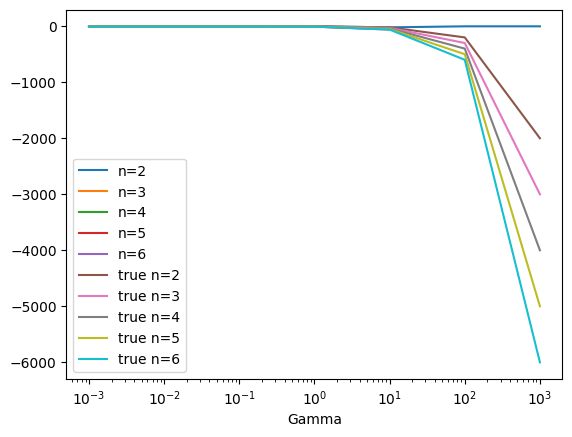

In [11]:
for i in range(len(eval_data)):
    plt.plot(gamma_vals, eval_data[i], label=f'n={i + 2}')
for i in range(len(true_evals)):
    plt.plot(gamma_vals, true_evals[i], label = f'true n={i + 2}')
plt.xlabel('Gamma')
plt.ylabel('')
plt.legend(loc = 'best')
plt.xscale('log')
# plt.yscale('log')
plt.show()

In [12]:
np.abs(np.array(eval_data) - np.array(true_evals))

array([[1.02327896e-04, 8.47387111e-05, 4.95474420e-03, 4.84064682e-08,
        1.18390570e-06, 1.98010000e+02, 1.99800100e+03],
       [1.91723657e-04, 3.00759269e-05, 4.18762331e-04, 5.77211380e-04,
        4.65110903e-03,            nan,            nan],
       [1.04235245e-04, 3.13391991e-05, 6.53095730e-05, 4.58686541e-02,
        2.15891080e-02,            nan,            nan],
       [1.08538361e-04, 2.67723540e-05, 1.69458175e-05, 9.80132213e-03,
        7.68155077e-03,            nan,            nan],
       [1.15464081e-04, 1.68120750e-04, 1.35918661e-05, 4.33155192e-02,
        1.61738596e-02,            nan,            nan]])

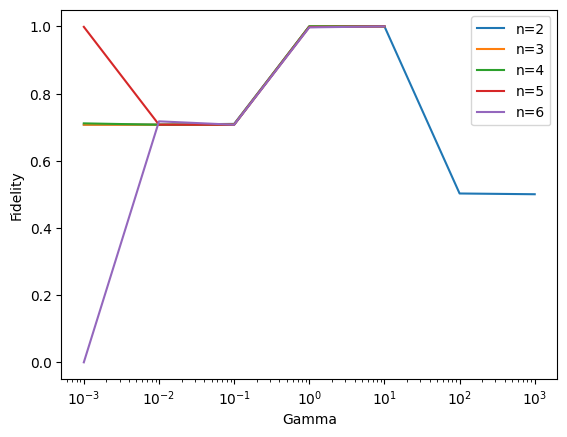

In [13]:
for i in range(len(evec_data)):
    plt.plot(gamma_vals, evec_data[i], label=f'n={i + 2}')
plt.xlabel('Gamma')
plt.ylabel('Fidelity')
plt.legend(loc = 'best')
plt.xscale('log')
# plt.yscale('log')
plt.show()

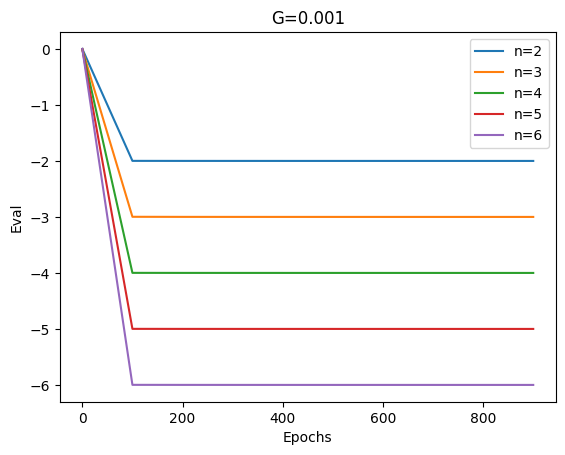

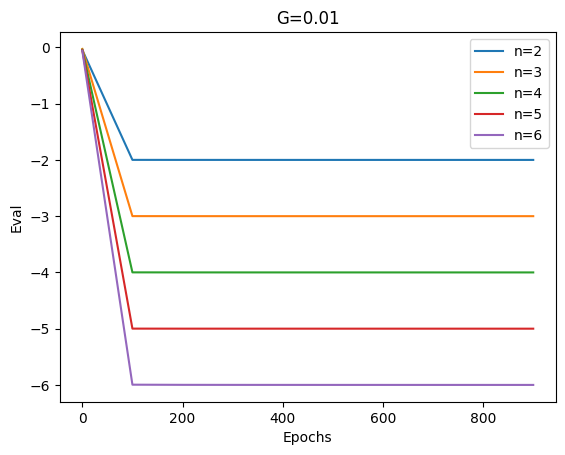

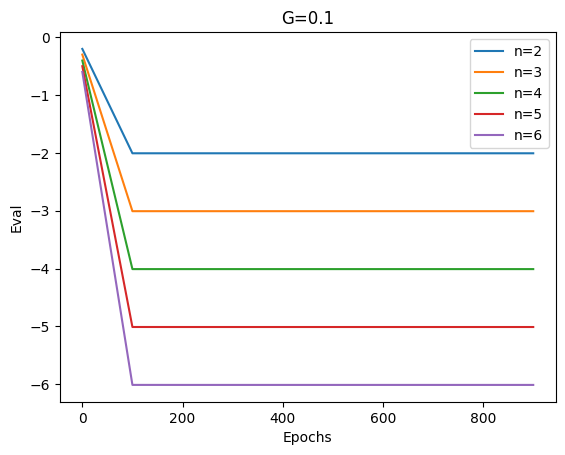

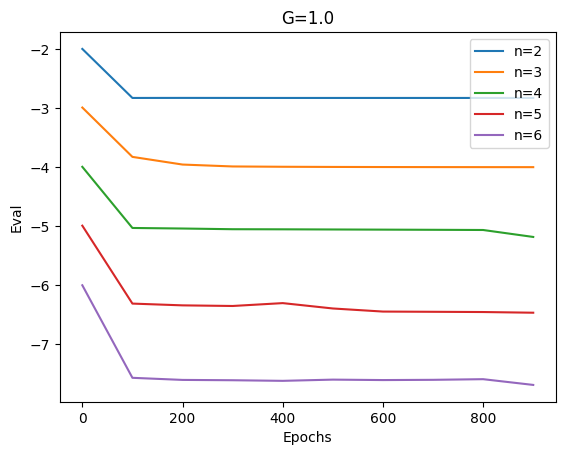

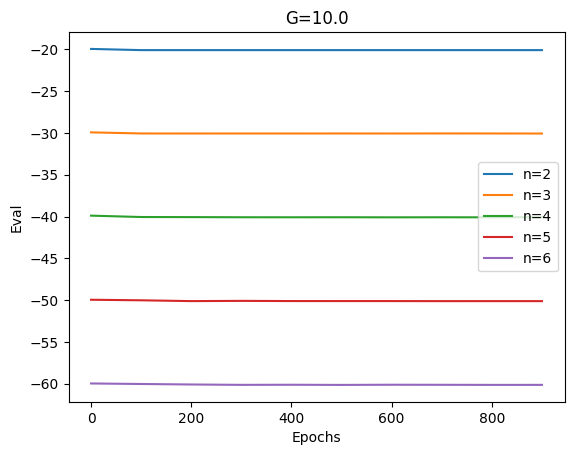

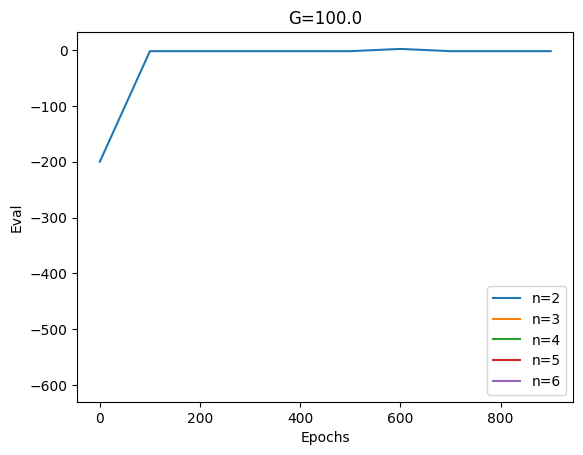

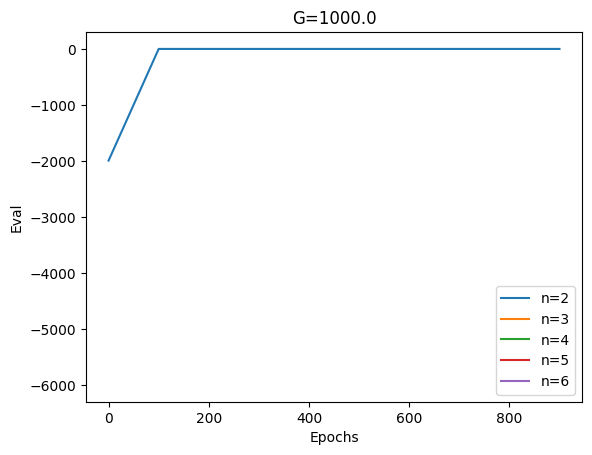

In [14]:
epochs = [n for n in range(0, 1000, 100)]
for i in range(len(gamma_vals)):
    for j in range(len(epochs_data)):
        plt.plot(epochs, epochs_data[j][i], label = f'n={j+2}')
    plt.title(f'G={gamma_vals[i]}')
    plt.xlabel('Epochs')
    plt.ylabel('Eval')
    plt.legend(loc = 'best')
    plt.show()

In [15]:
evec_data = []
eval_data = []
epochs_data = []
J = 1
gamma_vals = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
for n in range(2, 7):
    print(n)
    print(time.time())
    fidelities = []
    evals = []
    graphs = []
    for Gamma in gamma_vals:
        # init neural network
        model = nn.Sequential(
            nn.Linear(n, 5 * n),
            nn.Sigmoid(),
            nn.Linear(5 * n, 2),
            nn.Sigmoid()
        )
        input = lib.generate_input_torch(n)

        # train NN

        vars = (n, J, Gamma)
        loss_fn = lib.TFIM_expectation_from_torch
        epochs = []
        loss_data = []
        optimizer = torch.optim.SGD(model.parameters(), lr = 2)
        for epoch in range(1000):
            y_pred = model(input)
            loss = loss_fn(y_pred, vars, logamp_phase_c)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if epoch % 100 == 0:
                loss_data.append(loss.item())
                epochs.append(epoch)

        # find groud state
        gs = lib.model_to_ground_state(model, input, logamp_phase_c)
        
        # confirmation
        h = lib.TFIM_hamiltonian(n, J, Gamma)

        fidelities.append(qt.fidelity(qt.Qobj([s for s in gs]), h.eigenstates()[1][0]))
        evals.append(loss_data[-1])
        graphs.append(loss_data)
    evec_data.append(fidelities)
    eval_data.append(evals)
    epochs_data.append(graphs)
print(time.time())

2
1728706063.312147
3
1728706102.7649019
4
1728706174.3323042
5
1728706361.229498
6
1728706681.6363559
1728707112.657914


In [16]:
true_evals = []
for n in range(2, 7):
    x = []
    for Gamma in gamma_vals:
        h = lib.TFIM_hamiltonian(n, J, Gamma)
        x.append(h.eigenstates()[0][0])
    true_evals.append(x)

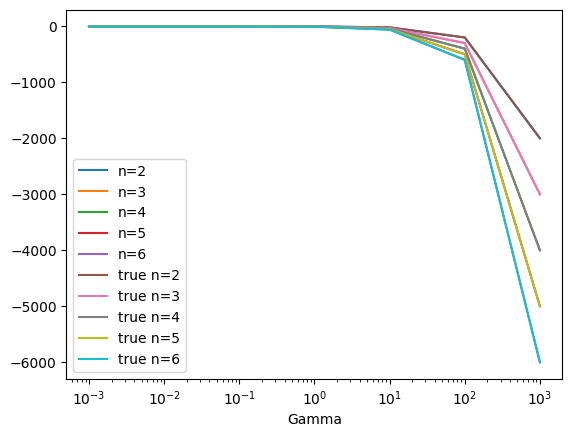

In [17]:
for i in range(len(eval_data)):
    plt.plot(gamma_vals, eval_data[i], label=f'n={i + 2}')
for i in range(len(true_evals)):
    plt.plot(gamma_vals, true_evals[i], label = f'true n={i + 2}')
plt.xlabel('Gamma')
plt.ylabel('')
plt.legend(loc = 'best')
plt.xscale('log')
# plt.yscale('log')
plt.show()

In [18]:
np.abs(np.array(eval_data) - np.array(true_evals))

array([[7.34060215e-01, 7.21678834e-01, 6.05490495e-01, 1.65386248e-01,
        7.23442930e-07, 1.00156128e-05, 1.24414037e-03],
       [1.61049024e+00, 1.59004906e+00, 1.38688825e+00, 2.71376371e-01,
        2.90040912e-06, 2.96106066e-07, 7.50375038e-04],
       [2.15519421e+00, 2.76303910e+00, 2.46441315e+00, 2.24728842e-01,
        5.55086914e-06, 2.11269423e-05, 1.48828162e-03],
       [4.05810612e+00, 4.02122117e+00, 3.63752498e+00, 8.54498321e-01,
        1.58967757e-04, 1.83914075e-05, 1.67968743e-03],
       [4.79718287e+00, 4.84536341e+00, 4.30613947e+00, 9.47508444e-01,
        4.38233419e-04, 1.45546613e-05, 1.98828133e-03]])

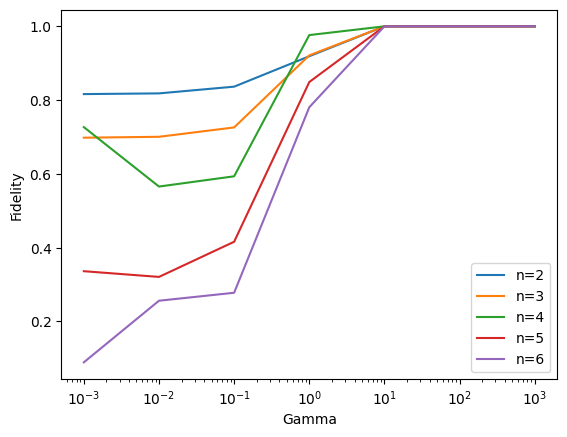

In [19]:
for i in range(len(evec_data)):
    plt.plot(gamma_vals, evec_data[i], label=f'n={i + 2}')
plt.xlabel('Gamma')
plt.ylabel('Fidelity')
plt.legend(loc = 'best')
plt.xscale('log')
# plt.yscale('log')
plt.show()

In [20]:
np.array(epochs_data).shape

(5, 7, 10)

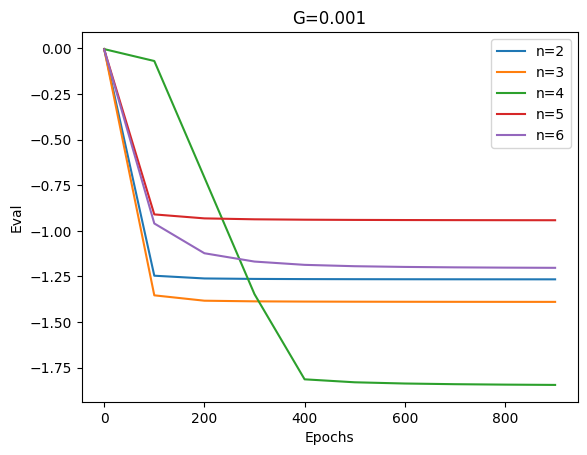

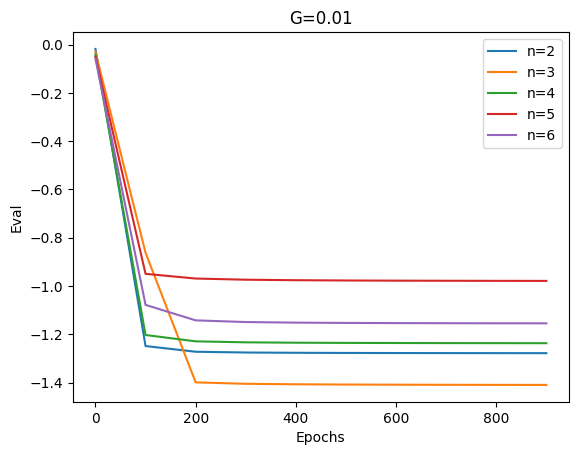

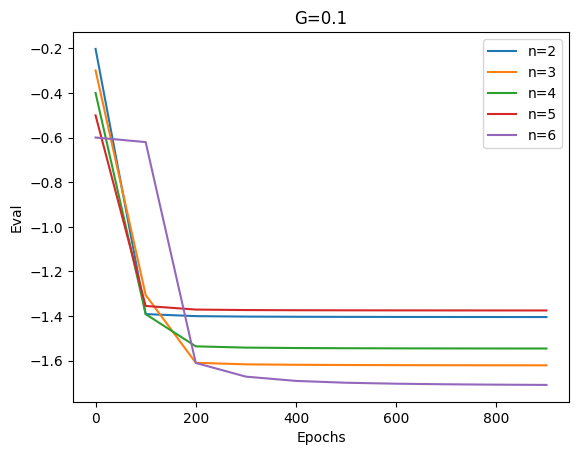

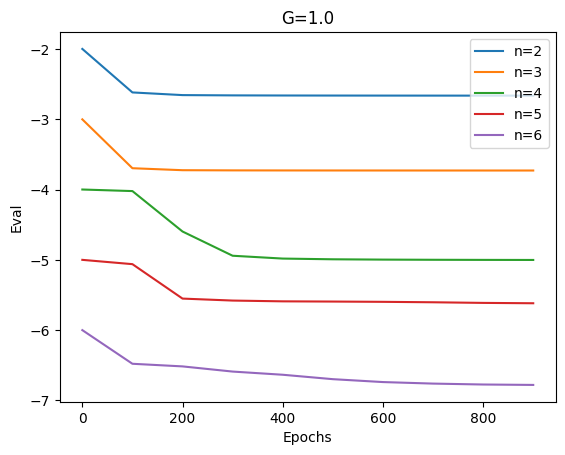

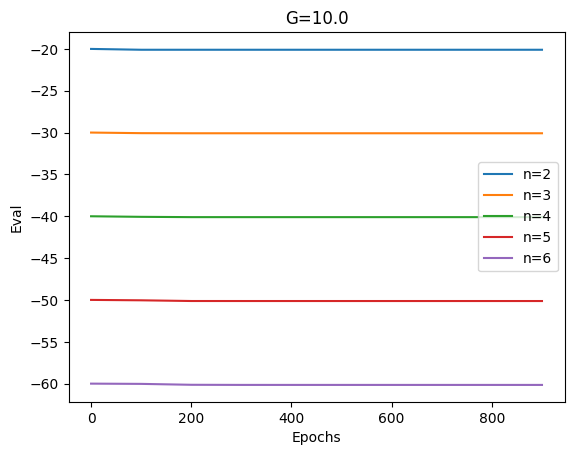

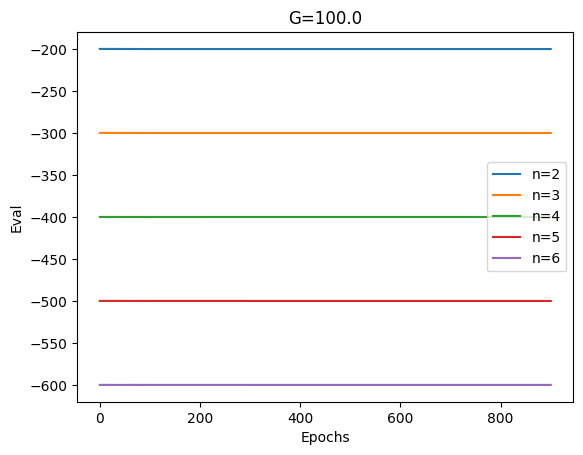

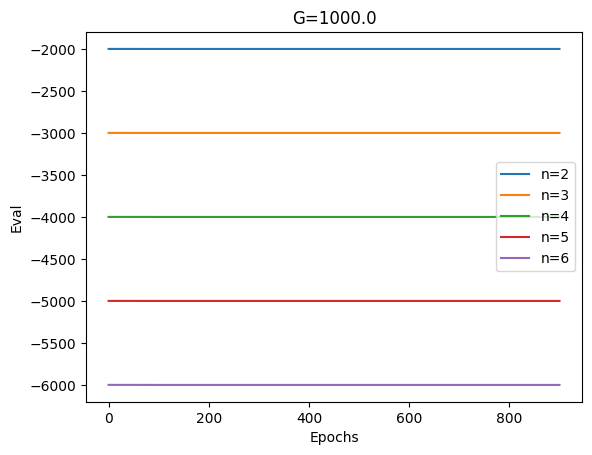

In [21]:
epochs = [n for n in range(0, 1000, 100)]
for i in range(len(gamma_vals)):
    for j in range(len(epochs_data)):
        plt.plot(epochs, epochs_data[j][i], label = f'n={j+2}')
    plt.title(f'G={gamma_vals[i]}')
    plt.xlabel('Epochs')
    plt.ylabel('Eval')
    plt.legend(loc = 'best')
    plt.show()